# Linear Regression with Pyhton

Este bloc esta basado en el video: [Machine Learning Tutorial 1 - Linear Regression on Boston Housing Dataset | Machine Learning Basics](https://www.youtube.com/watch?v=ZeM2tHtjGy4&ab_channel=KGPTalkie)

## House Price Prediction on Boston Housing Dataset

You are a real estate agent and you want to predict the house price. It would be great if you can make some kind of automated system which predict price of  a house based on various input which us known as feature.  

Supervirsed Machine Learning algorithms needs some data to train its model before making a prediction. We have a Boston Dataset

## Let's get started

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from sklearn.datasets import load_boston

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
boston = load_boston()

In [23]:
type(boston)

sklearn.utils.Bunch

In [24]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [25]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [26]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [28]:
data = boston.data
type(data)

numpy.ndarray

In [29]:
data.shape

(506, 13)

In [30]:
data = pd.DataFrame(data=data, columns=boston.feature_names)
data.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [31]:
data['Price'] = boston.target
data.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

## Understand your Data

In [32]:
data.describe()

CRIM          ZN       INDUS  ...           B       LSTAT       Price
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [34]:
data.isnull()

CRIM     ZN  INDUS   CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT  Price
0    False  False  False  False  False  ...  False    False  False  False  False
1    False  False  False  False  False  ...  False    False  False  False  False
2    False  False  False  False  False  ...  False    False  False  False  False
3    False  False  False  False  False  ...  False    False  False  False  False
4    False  False  False  False  False  ...  False    False  False  False  False
..     ...    ...    ...    ...    ...  ...    ...      ...    ...    ...    ...
501  False  False  False  False  False  ...  False    False  False  False  False
502  False  False  False  False  False  ...  False    False  False  False  False
503  False  False  False  False  False  ...  False    False  False  False  False
504  False  False  False  False  False  ...  False    False  False  False  False
505  False  False  False  False  False  ...  False    False  False  False  False

[506 rows x 14 columns]

In [35]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Data Visualization

We will start by creating a scatterplot matrix that will allow us to visualize the pair-wise relationships and correlations between the different features. It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

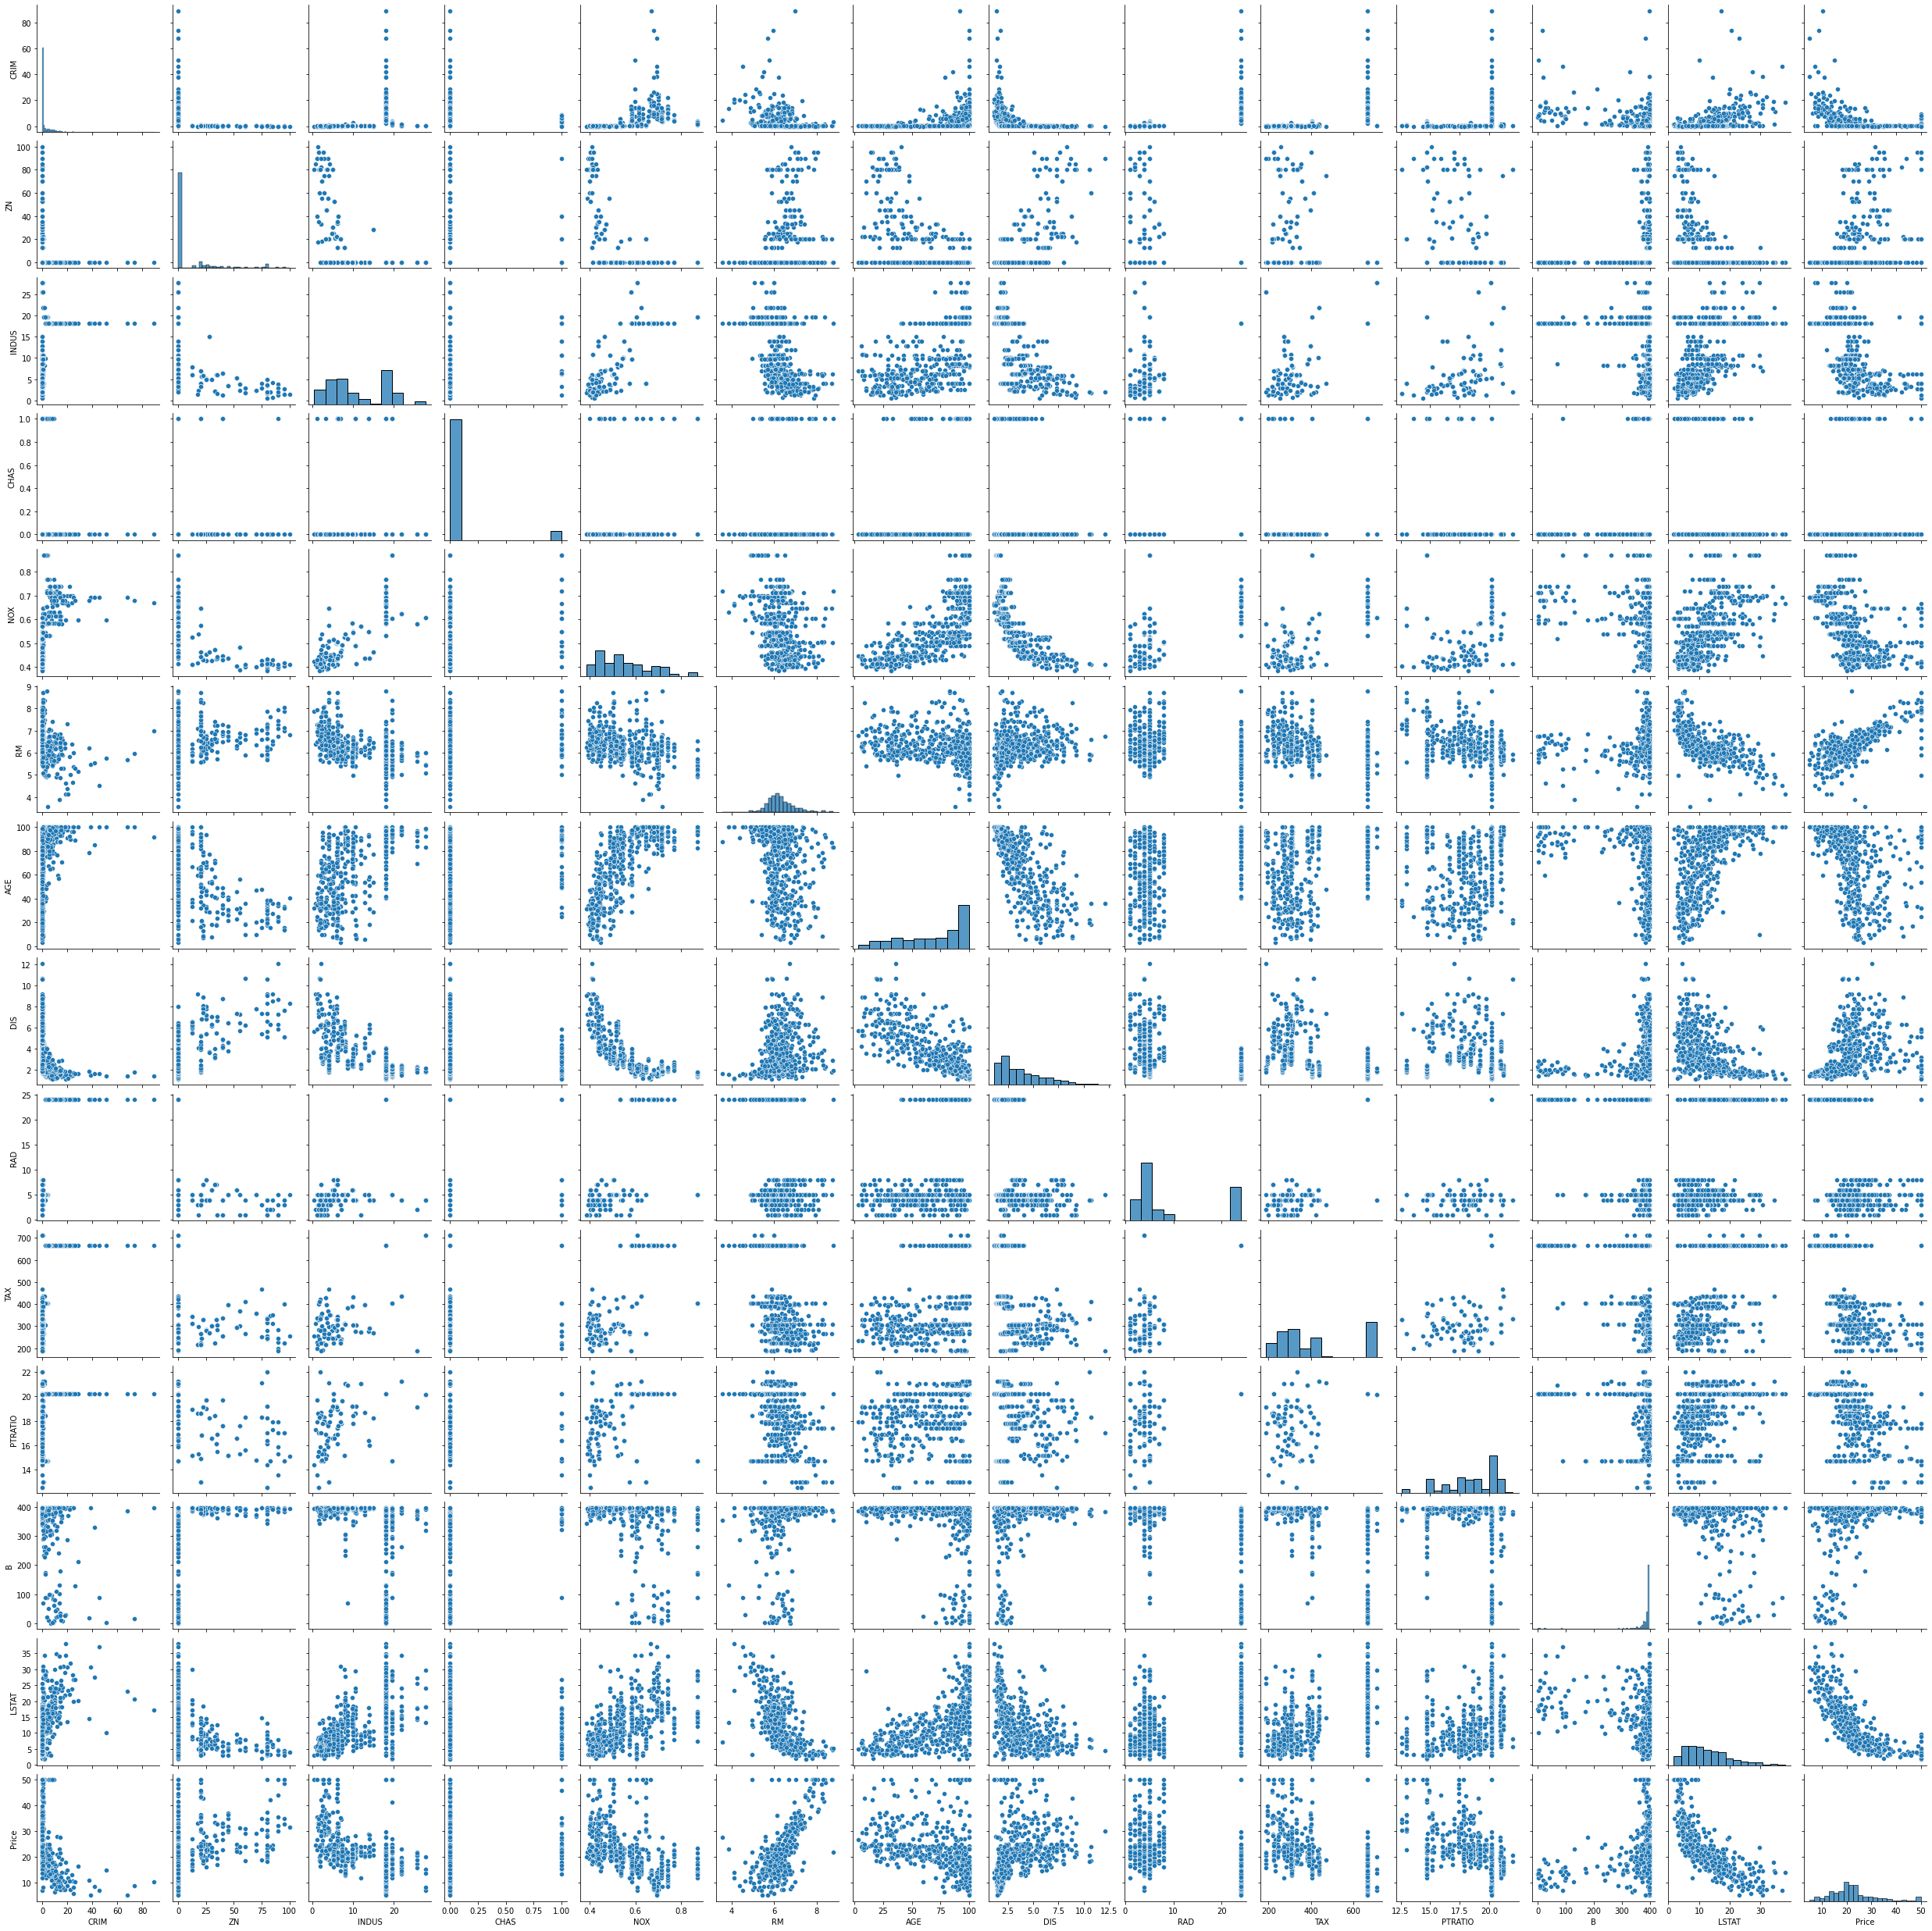

In [36]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

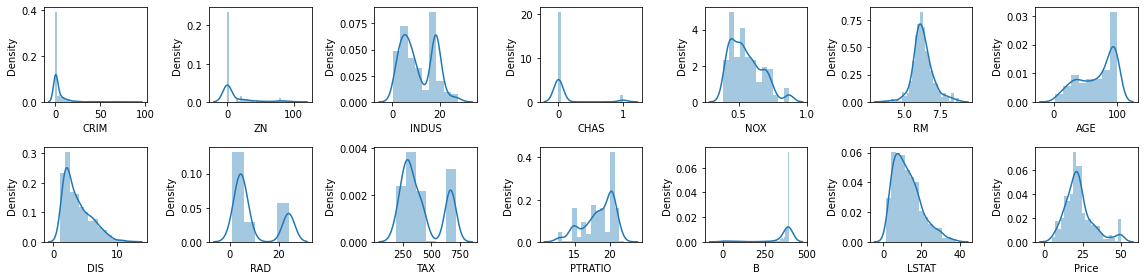

In [37]:
rows = 2
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))

col = data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

We are going to create a new correlation matrix to quantify and summarize the relationships bewteen the variables. The corretalion matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covarieace matrix, computed from standardize features.  

It is a square matrix (with the same number of columns and rows) that contains the Person's correlation coefficient.

In [38]:
corrmat = data.corr()
corrmat

CRIM        ZN     INDUS  ...         B     LSTAT     Price
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.366087  1.000000 -0.737663
Price   -0.388305  0.360445 -0.483725  ...  0.333461 -0.737663  1.000000

[14 rows x 14 columns]

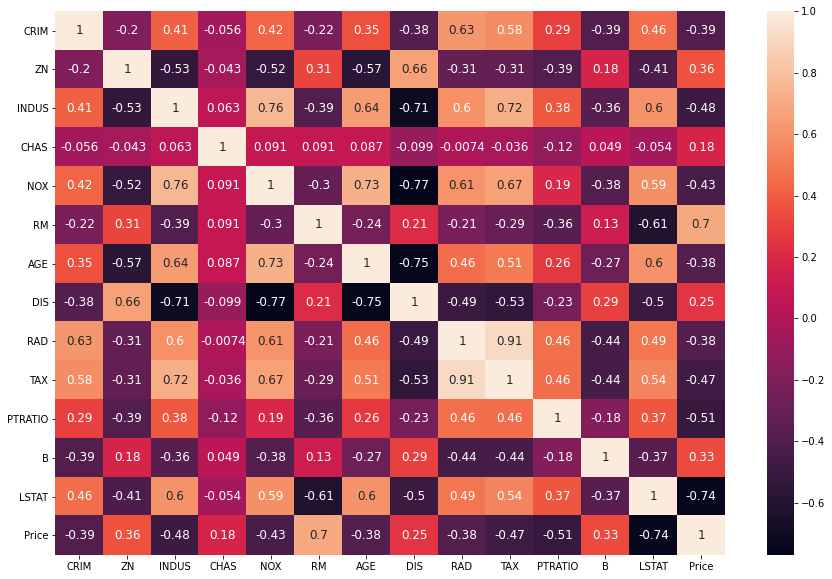

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size': 12})

In [40]:
def getCorrelatedFeature(corrdata, threshold):
  feature = []
  value = []
  
  for i, index in enumerate(corrdata.index):
    if abs(corrdata[index]) > threshold:
      feature.append(index)
      value.append(corrdata[index])

  df = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
  return df

In [41]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

Corr Value
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Price      1.000000

In [42]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [43]:
correlated_data = data[corr_value.index]
correlated_data.head()

RM  PTRATIO  LSTAT  Price
0  6.575     15.3   4.98   24.0
1  6.421     17.8   9.14   21.6
2  7.185     17.8   4.03   34.7
3  6.998     18.7   2.94   33.4
4  7.147     18.7   5.33   36.2

## Pairplot and Corrmat of correlated data

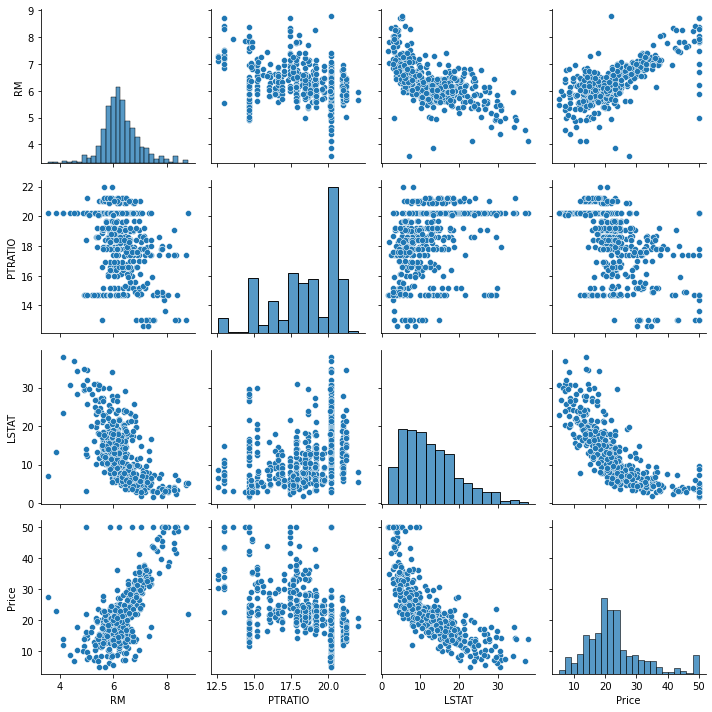

In [44]:
sns.pairplot(correlated_data)
plt.tight_layout()

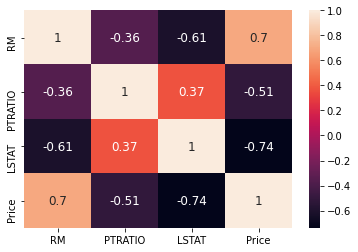

In [45]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

## Shuffle and Split Data

We will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset. 

In [46]:
X = correlated_data.drop(labels=['Price'], axis = 1)
y = correlated_data['Price']
X.head()

RM  PTRATIO  LSTAT
0  6.575     15.3   4.98
1  6.421     17.8   9.14
2  7.185     17.8   4.03
3  6.998     18.7   2.94
4  7.147     18.7   5.33

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

## Let's train the model

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_predict = model.predict(X_test)

In [52]:
df = pd.DataFrame(data=[y_predict, y_test])
df.T

0     1
0    27.609031  22.6
1    22.099034  50.0
2    26.529255  23.0
3    12.507986   8.3
4    22.254879  21.2
..         ...   ...
97   28.271228  24.7
98   18.467419  14.1
99   18.558070  18.7
100  24.681964  28.1
101  20.826879  19.8

[102 rows x 2 columns]

## Defining performance metrics

It is a difficult to measure the quality of a given model without quantifying its performance over training and testing. This is a typically done a using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, $R^{2}$, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as if often describes how "good" that model is at making predictions.  

The values for $R^{2}$ range from 0 to 1, which captures the percentage of squared correlation bewteen the predicted and actual values of the target variable. A model with an $R^{2}$ of 0 always fails the predict the tarfet value, where as model with an $R^{2}$ of 1 perfectly predicts the target variable. Any values bewteen 0 and 1 indicates what percentage of the target variable, using this model, can be explanied by the features. A model can be given a negative $R^{2}$ as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.  

For this performance_metric function in the code cell below, you will need the implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.  

Now, we will find $R^{2}$ which is definited as follows:

$$ SS_{t} = \sum_{i=1}^{m} (y_{i}-\bar{y})^{2} $$

$$ SS_{r} = \sum_{i=1}^{m} (y_{i}-\widehat{y_{i}})^{2} $$

$$ R_{2} = 1 - \frac{SS_{r}}{SS_{t}} $$

$SS_{t}$ is the total sum of squares and $SS_{r}$ is the total sum of squares of residuals. $R_{2}$ Score usually range from 0 to 1. It will also become negative if the model is completely wrong.  

Now we will find $R^{2}$ Score.   

  
$R^{2}$ Score:  

_Bad Model_: The error should be similar. $R^{2}$ score should be close to 0.  

_Good Model_: The mean square error for the linear regression model square error for the simple model. $R^{2}$ score should be close to 1. 


## Regression Evaluarion Metrics

Here are three common evaluation metrics for regression problems:  

**Mean Absolute Error** (MAE) is the mean of the absolute value of errors:

$$ \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \widehat{y}_{i}| $$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$ \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \widehat{y}_{i})^{2} $$

**Root Mean Squared Error** (RMSE) is the square root of the squered errors:

$$ \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \widehat{y}_{i})^{2}} $$

Comparing these metrics:

- **MAE** is the easiest to understand, becouse it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, becouse RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [53]:
from sklearn.metrics import r2_score

In [54]:
correlated_data.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [55]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.48816420156925067
mae:  4.404434993909257
mse:  41.67799012221683


## Store feature performance

In [56]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [57]:
def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [58]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE     MSE
0  ['RM' 'PTRATIO' 'LSTAT' 'Price']        3  ...  4.40443  41.678

[1 rows x 6 columns]

## Regression Plot of the features correlated with the house price

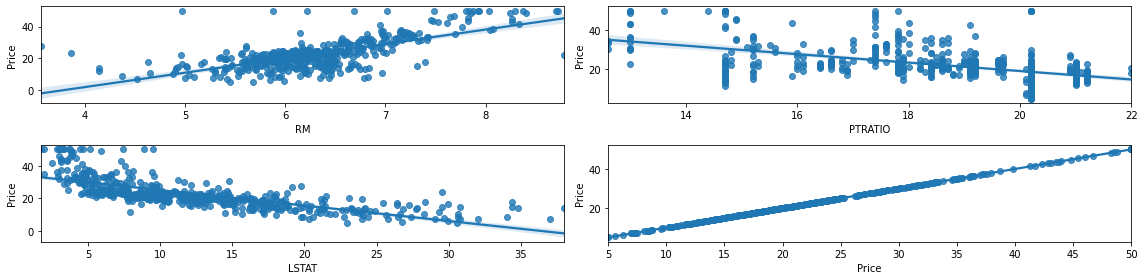

In [59]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))

col = correlated_data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.regplot(x=correlated_data[col[index]], y=correlated_data['Price'], ax=ax[i][j])
    index += 1 
fig.tight_layout()

## Let's find out other combination of columns to get better accuracy with $>60\%$. 

In [60]:
corrmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [61]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

Corr Value
RM       0.695360
LSTAT   -0.737663
Price    1.000000

In [62]:
correlated_data = data[corr_value.index]
correlated_data.head()

RM  LSTAT  Price
0  6.575   4.98   24.0
1  6.421   9.14   21.6
2  7.185   4.03   34.7
3  6.998   2.94   33.4
4  7.147   5.33   36.2

In [267]:
def get_y_predict(corr_data, dato):
  X = corr_data.drop(labels=[dato], axis=1)
  y = corr_data[dato]

  X_train, X_test, y_train, x_train = train_test_split(X, y, test_size=0.2, random_state=0)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  return y_predict

In [271]:
y_predict = get_y_predict(correlated_data, 'Price')

In [273]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature corr_value  r2_score       MAE       MSE
0  ['RM' 'LSTAT' 'Price']        2        0.5  0.464536  0.380432  0.284672
1  ['RM' 'LSTAT' 'Price']        2        0.6  0.464536  0.380432  0.284672
2  ['RM' 'LSTAT' 'Price']        2        0.6  -568.052   16.3635   302.529
3  ['RM' 'LSTAT' 'Price']        2        0.6  -568.052   16.3635   302.529
4  ['RM' 'LSTAT' 'Price']        2        0.6  -568.052   16.3635   302.529

## Let's find out other combination of columns to get better accuracy $>70\%$

In [67]:
corrmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [68]:
threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

Corr Value
LSTAT   -0.737663
Price    1.000000

In [69]:
correlated_data = data[corr_value.index]
correlated_data.head()

LSTAT  Price
0   4.98   24.0
1   9.14   21.6
2   4.03   34.7
3   2.94   33.4
4   5.33   36.2

In [70]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0  ['RM' 'PTRATIO' 'LSTAT' 'Price']        3  ...  4.40443   41.678
1            ['RM' 'LSTAT' 'Price']        2  ...  4.14244  37.3831
2                 ['LSTAT' 'Price']        1  ...  4.86401  46.3363

[3 rows x 6 columns]

## Let's go ahead and select only RM feature

In [71]:
correlated_data = data[['RM', 'Price']]
correlated_data.head()

RM  Price
0  6.575   24.0
1  6.421   21.6
2  7.185   34.7
3  6.998   33.4
4  7.147   36.2

In [72]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0  ['RM' 'PTRATIO' 'LSTAT' 'Price']        3  ...  4.40443   41.678
1            ['RM' 'LSTAT' 'Price']        2  ...  4.14244  37.3831
2                 ['LSTAT' 'Price']        1  ...  4.86401  46.3363
3                    ['RM' 'Price']        1  ...  4.32474  46.9074

[4 rows x 6 columns]

## Let's find out other combination of columns to get better accuracy $>40\%$

In [79]:
threshold = 0.40
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

Corr Value
INDUS     -0.483725
NOX       -0.427321
RM         0.695360
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Price      1.000000

In [80]:
correlated_data = data[corr_value.index]
correlated_data.head()

INDUS    NOX     RM    TAX  PTRATIO  LSTAT  Price
0   2.31  0.538  6.575  296.0     15.3   4.98   24.0
1   7.07  0.469  6.421  242.0     17.8   9.14   21.6
2   7.07  0.469  7.185  242.0     17.8   4.03   34.7
3   2.18  0.458  6.998  222.0     18.7   2.94   33.4
4   2.18  0.458  7.147  222.0     18.7   5.33   36.2

In [81]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0                   ['RM' 'PTRATIO' 'LSTAT' 'Price']        3  ...  4.40443   41.678
1                             ['RM' 'LSTAT' 'Price']        2  ...  4.14244  37.3831
2                                  ['LSTAT' 'Price']        1  ...  4.86401  46.3363
3                                     ['RM' 'Price']        1  ...  4.32474  46.9074
4       INDUS    NOX     RM    TAX  PTRATIO  LSTA...      505  ...   4.3945  42.6519
5       INDUS    NOX     RM    TAX  PTRATIO  LSTA...      505  ...   4.3945  42.6519
6       INDUS    NOX     RM    TAX  PTRATIO  LSTA...      505  ...   4.3945  42.6519

[7 rows x 6 columns]

## Normalization and Standardization

In [82]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [83]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4881642015692508

## Plotting Learning Curve

In [84]:
from sklearn.model_selection import learning_curve, ShuffleSplit

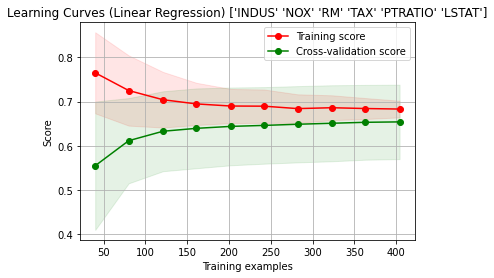

In [85]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    return plt

X = correlated_data.drop(labels = ['Price'], axis = 1)
y = correlated_data['Price']

title = "Learning Curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

# Higher correlation and precision tests

## Precision of CRIM

In [277]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['CRIM'], threshold)
corr_value

Corr Value
CRIM    1.000000
RAD     0.625505
TAX     0.582764

In [278]:
corr_value.index.values

array(['CRIM', 'RAD', 'TAX'], dtype=object)

In [279]:
correlated_data = data[corr_value.index]
correlated_data.head()

CRIM  RAD    TAX
0  0.00632  1.0  296.0
1  0.02731  2.0  242.0
2  0.02729  2.0  242.0
3  0.03237  3.0  222.0
4  0.06905  3.0  222.0

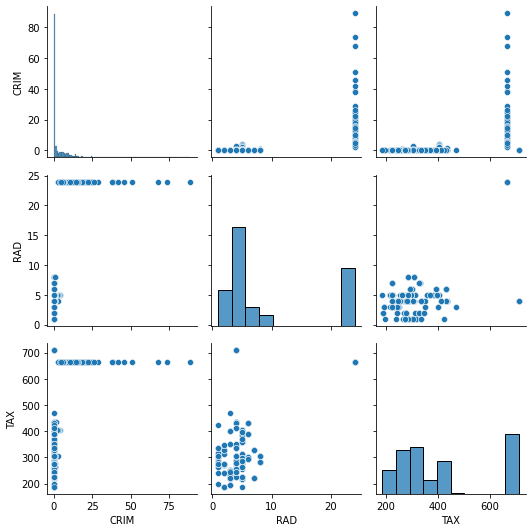

In [280]:
sns.pairplot(correlated_data)
plt.tight_layout()

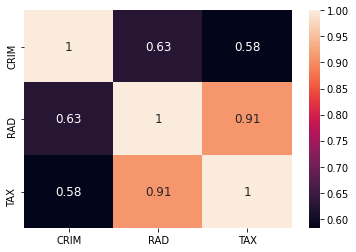

In [281]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

In [282]:
X = correlated_data.drop(labels=['CRIM'], axis = 1)
y = correlated_data['CRIM']
X.head()

RAD    TAX
0  1.0  296.0
1  2.0  242.0
2  2.0  242.0
3  3.0  222.0
4  3.0  222.0

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [284]:
X_train.shape, X_test.shape

((404, 2), (102, 2))

In [285]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
y_predict = model.predict(X_test)

In [287]:
df = pd.DataFrame(data=[y_predict, y_test])
df.T

0         1
0     0.625387   0.06724
1    11.978613   9.23230
2     0.634282   0.11425
3    11.978613  24.80170
4     1.045437   0.05646
..         ...       ...
97   -0.824705   0.02055
98   11.978613   4.75237
99    2.244925   0.14932
100   0.109758   0.14052
101   0.998255   0.12802

[102 rows x 2 columns]

In [288]:
correlated_data.columns

Index(['CRIM', 'RAD', 'TAX'], dtype='object')

In [289]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.3813627864526872
mae:  3.050868609315613
mse:  64.11170956770995


In [290]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [291]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature corr_value  r2_score      MAE      MSE
0  ['CRIM' 'RAD' 'TAX']        2        0.5  0.381363  3.05087  64.1117

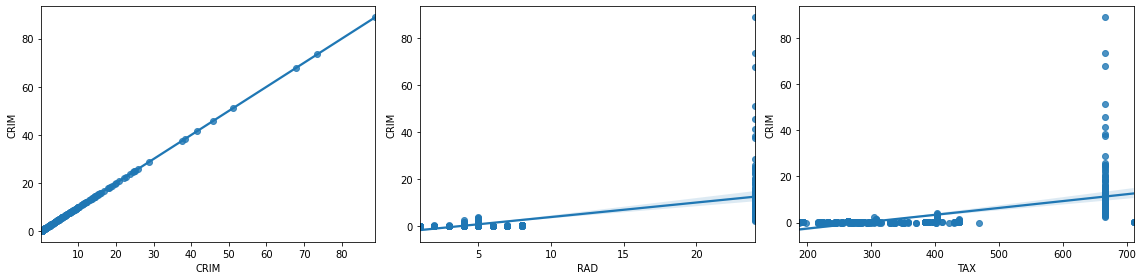

In [293]:
cols = 3
fig, ax = plt.subplots(ncols=cols, figsize=(16,4))

col = correlated_data.columns
index = 0

for i in range(cols):
  sns.regplot(x=correlated_data[col[index]], y=correlated_data['CRIM'], ax=ax[i])
  index += 1 
fig.tight_layout()

In [294]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['CRIM'], threshold)
corr_value

Corr Value
CRIM    1.000000
RAD     0.625505

In [295]:
correlated_data = data[corr_value.index]
correlated_data.head()

CRIM  RAD
0  0.00632  1.0
1  0.02731  2.0
2  0.02729  2.0
3  0.03237  3.0
4  0.06905  3.0

In [296]:
y_predict = get_y_predict(correlated_data, 'CRIM')
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature corr_value  r2_score      MAE      MSE
0  ['CRIM' 'RAD' 'TAX']        2        0.5  0.381363  3.05087  64.1117
1        ['CRIM' 'RAD']        1        0.6  0.380088  3.07864  64.2439

In [297]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [298]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.3813627864526873

## Precision of ZN

In [299]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['ZN'], threshold)
corr_value

Corr Value
ZN       1.000000
INDUS   -0.533828
NOX     -0.516604
AGE     -0.569537
DIS      0.664408

In [300]:
corr_value.index.values

array(['ZN', 'INDUS', 'NOX', 'AGE', 'DIS'], dtype=object)

In [301]:
correlated_data = data[corr_value.index]
correlated_data.head()

ZN  INDUS    NOX   AGE     DIS
0  18.0   2.31  0.538  65.2  4.0900
1   0.0   7.07  0.469  78.9  4.9671
2   0.0   7.07  0.469  61.1  4.9671
3   0.0   2.18  0.458  45.8  6.0622
4   0.0   2.18  0.458  54.2  6.0622

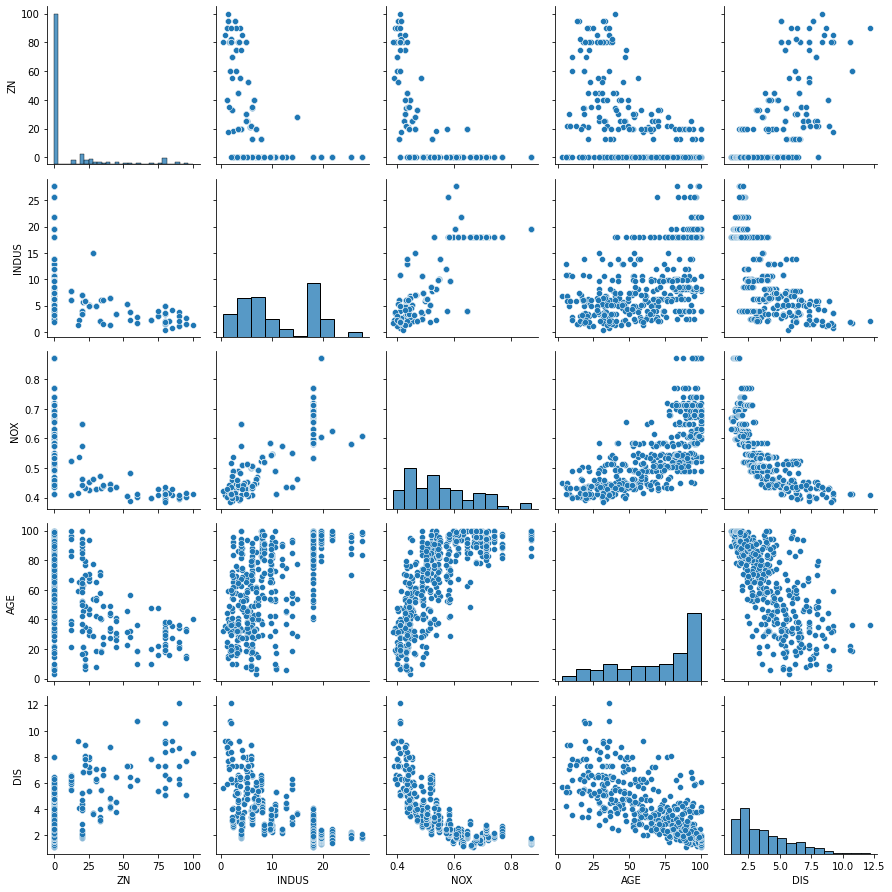

In [302]:
sns.pairplot(correlated_data)
plt.tight_layout()

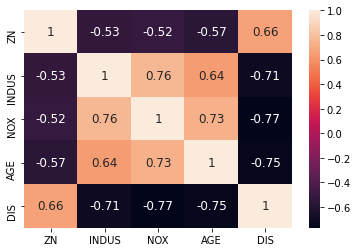

In [303]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

In [304]:
X = correlated_data.drop(labels=['ZN'], axis = 1)
y = correlated_data['ZN']
X.head()

INDUS    NOX   AGE     DIS
0   2.31  0.538  65.2  4.0900
1   7.07  0.469  78.9  4.9671
2   7.07  0.469  61.1  4.9671
3   2.18  0.458  45.8  6.0622
4   2.18  0.458  54.2  6.0622

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [306]:
X_train.shape, X_test.shape

((404, 4), (102, 4))

In [307]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [308]:
y_predict = model.predict(X_test)

In [310]:
df = pd.DataFrame(data=[y_predict, y_test])
df.T

0     1
0    30.778351   0.0
1    -9.767571   0.0
2     3.756797   0.0
3    -4.589649   0.0
4    17.545739   0.0
..         ...   ...
97   49.165493  85.0
98    1.634556   0.0
99   31.714951  25.0
100  18.037824   0.0
101  -0.176614   0.0

[102 rows x 2 columns]

In [311]:
correlated_data.columns

Index(['ZN', 'INDUS', 'NOX', 'AGE', 'DIS'], dtype='object')

In [312]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.4594857076585991
mae:  12.074335632613264
mse:  260.4986915775002


In [313]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [314]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0  ['ZN' 'INDUS' 'NOX' 'AGE' 'DIS']        4  ...  12.0743  260.499

[1 rows x 6 columns]

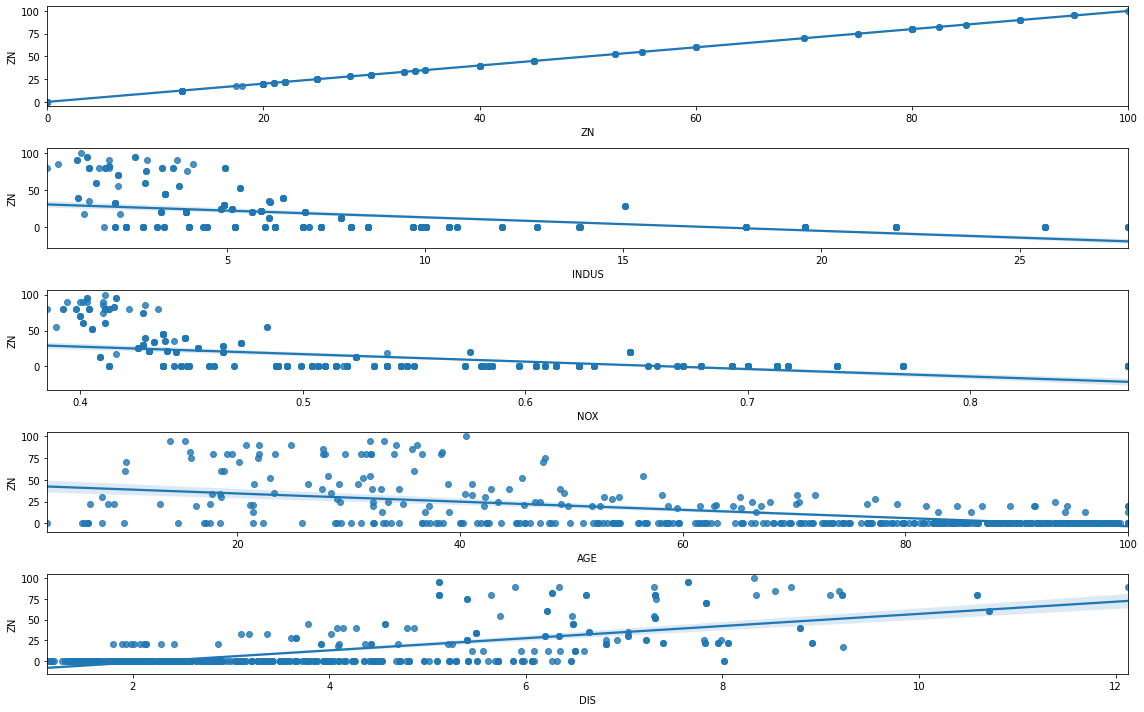

In [315]:
rows = 5
fig, ax = plt.subplots(nrows=rows, figsize=(16,10))

col = correlated_data.columns
index = 0

for i in range(rows):
  sns.regplot(x=correlated_data[col[index]], y=correlated_data['ZN'], ax=ax[i])
  index += 1 
fig.tight_layout()

In [316]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['ZN'], threshold)
corr_value

Corr Value
ZN     1.000000
DIS    0.664408

In [317]:
correlated_data = data[corr_value.index]
correlated_data.head()

ZN     DIS
0  18.0  4.0900
1   0.0  4.9671
2   0.0  4.9671
3   0.0  6.0622
4   0.0  6.0622

In [318]:
y_predict = get_y_predict(correlated_data, 'ZN')
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0  ['ZN' 'INDUS' 'NOX' 'AGE' 'DIS']        4  ...  12.0743  260.499
1                      ['ZN' 'DIS']        1  ...  11.5296   250.74

[2 rows x 6 columns]

In [319]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [320]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4594857076585992

## Precision of INDUS

In [321]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['INDUS'], threshold)
corr_value

Corr Value
ZN      -0.533828
INDUS    1.000000
NOX      0.763651
AGE      0.644779
DIS     -0.708027
RAD      0.595129
TAX      0.720760
LSTAT    0.603800

In [322]:
corr_value.index.values

array(['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'],
      dtype=object)

In [323]:
correlated_data = data[corr_value.index]
correlated_data.head()

ZN  INDUS    NOX   AGE     DIS  RAD    TAX  LSTAT
0  18.0   2.31  0.538  65.2  4.0900  1.0  296.0   4.98
1   0.0   7.07  0.469  78.9  4.9671  2.0  242.0   9.14
2   0.0   7.07  0.469  61.1  4.9671  2.0  242.0   4.03
3   0.0   2.18  0.458  45.8  6.0622  3.0  222.0   2.94
4   0.0   2.18  0.458  54.2  6.0622  3.0  222.0   5.33

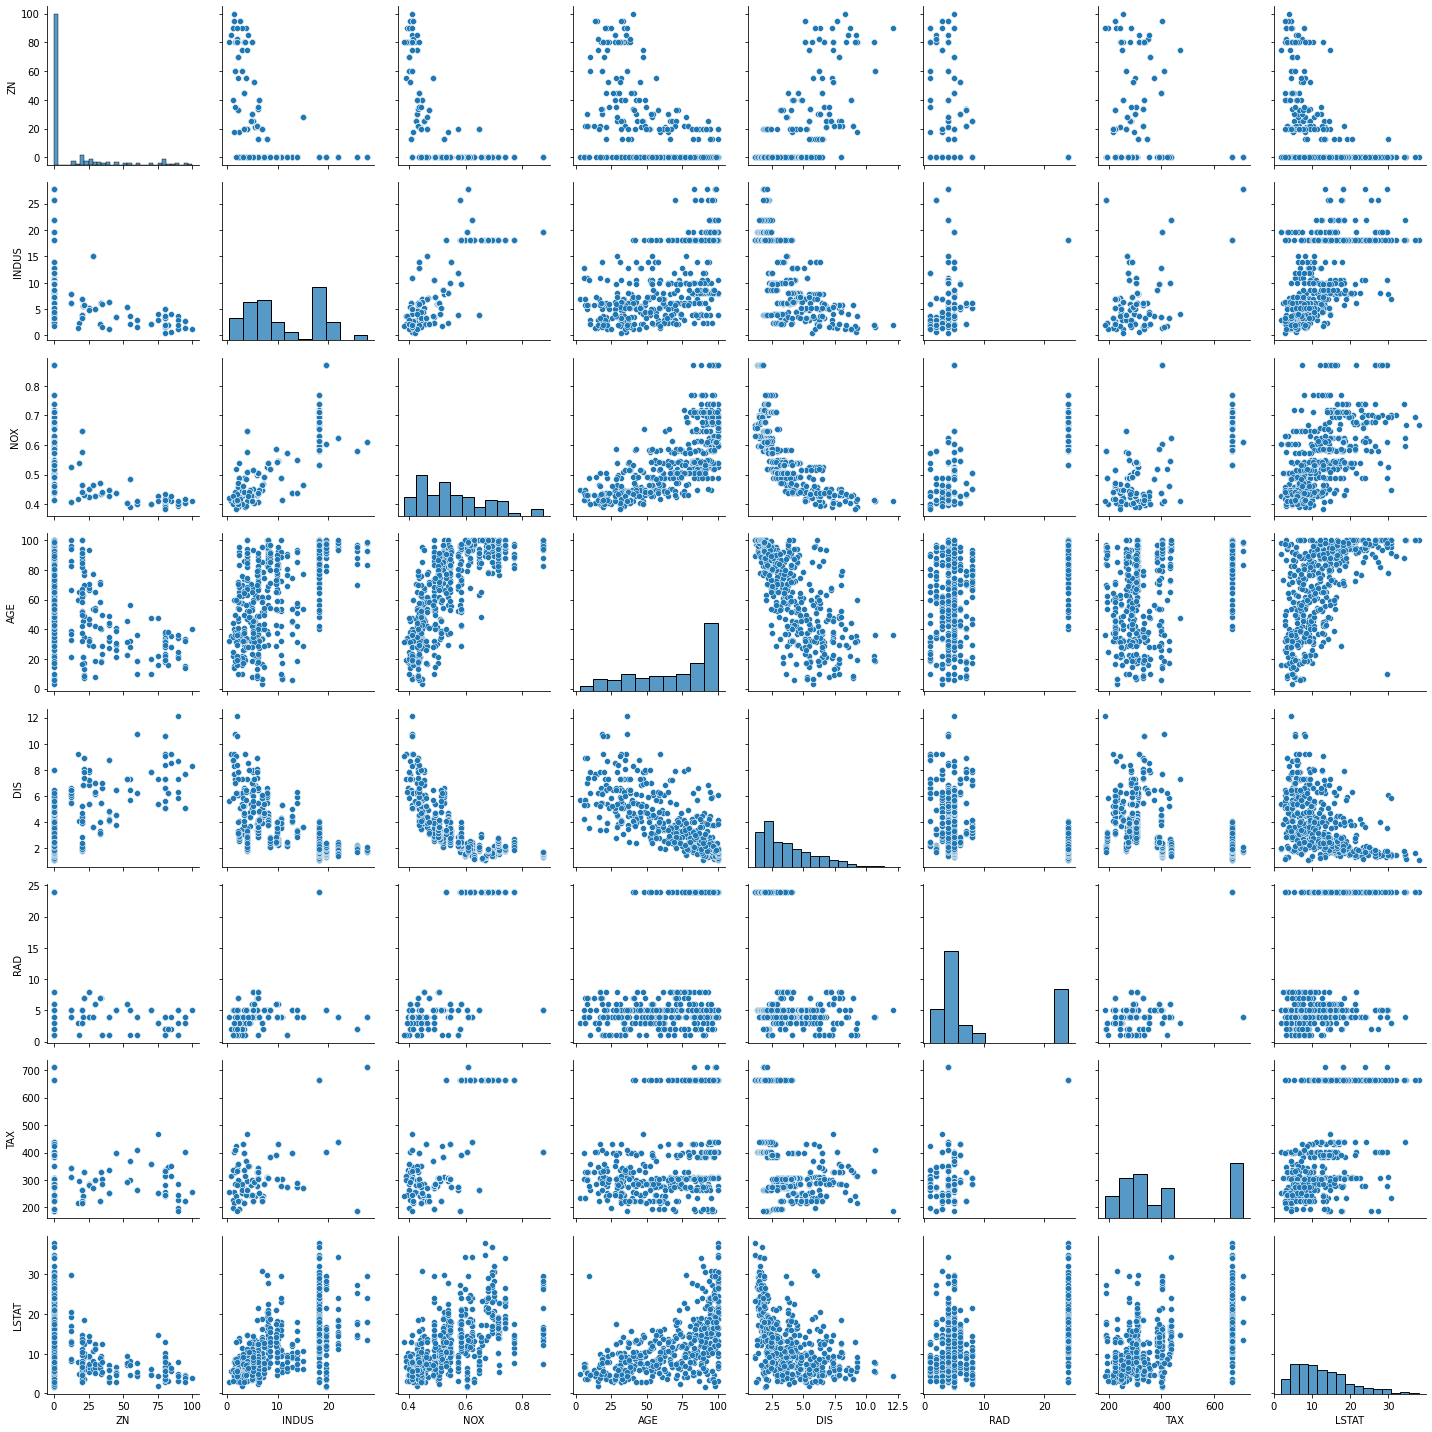

In [324]:
sns.pairplot(correlated_data)
plt.tight_layout()

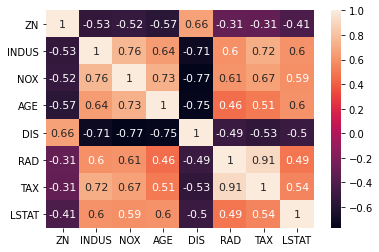

In [326]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 11})

In [327]:
X = correlated_data.drop(labels=['INDUS'], axis = 1)
y = correlated_data['INDUS']
X.head()

ZN    NOX   AGE     DIS  RAD    TAX  LSTAT
0  18.0  0.538  65.2  4.0900  1.0  296.0   4.98
1   0.0  0.469  78.9  4.9671  2.0  242.0   9.14
2   0.0  0.469  61.1  4.9671  2.0  242.0   4.03
3   0.0  0.458  45.8  6.0622  3.0  222.0   2.94
4   0.0  0.458  54.2  6.0622  3.0  222.0   5.33

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [329]:
X_train.shape, X_test.shape

((404, 7), (102, 7))

In [330]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
y_predict = model.predict(X_test)

In [332]:
df = pd.DataFrame(data=[y_predict, y_test])
df.T

0      1
0    11.670874   3.24
1    16.584324  18.10
2     9.017973  13.89
3    18.489582  18.10
4    10.499845  12.83
..         ...    ...
97    1.887172   0.74
98   18.190329  18.10
99    3.844198   5.13
100   8.389745  10.59
101  12.631209   8.56

[102 rows x 2 columns]

In [333]:
correlated_data.columns

Index(['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'], dtype='object')

In [334]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.7514931303516276
mae:  2.347978493719839
mse:  9.890568501104381


In [336]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [337]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0  ['ZN' 'INDUS' 'NOX' 'AGE' 'DIS' 'RAD' 'TAX' 'L...        7  ...  2.34798  9.89057

[1 rows x 6 columns]

In [338]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,10))

col = correlated_data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.regplot(x=correlated_data[col[index]], y=correlated_data['INDUS'], ax=ax[i][j])
    index += 1 
fig.tight_layout()

In [339]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['INDUS'], threshold)
corr_value

Corr Value
INDUS    1.000000
NOX      0.763651
AGE      0.644779
DIS     -0.708027
TAX      0.720760
LSTAT    0.603800

In [340]:
correlated_data = data[corr_value.index]
correlated_data.head()

INDUS    NOX   AGE     DIS    TAX  LSTAT
0   2.31  0.538  65.2  4.0900  296.0   4.98
1   7.07  0.469  78.9  4.9671  242.0   9.14
2   7.07  0.469  61.1  4.9671  242.0   4.03
3   2.18  0.458  45.8  6.0622  222.0   2.94
4   2.18  0.458  54.2  6.0622  222.0   5.33

In [342]:
y_predict = get_y_predict(correlated_data, 'INDUS')
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature  ...      MAE      MSE
0  ['ZN' 'INDUS' 'NOX' 'AGE' 'DIS' 'RAD' 'TAX' 'L...        7  ...  2.34798  9.89057
1          ['INDUS' 'NOX' 'AGE' 'DIS' 'TAX' 'LSTAT']        5  ...  2.31341  9.15858
2          ['INDUS' 'NOX' 'AGE' 'DIS' 'TAX' 'LSTAT']        5  ...  2.31341  9.15858

[3 rows x 6 columns]

In [343]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [344]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.7514931303516454

## Precision of NOX

In [345]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['NOX'], threshold)
corr_value

Corr Value
ZN      -0.516604
INDUS    0.763651
NOX      1.000000
AGE      0.731470
DIS     -0.769230
RAD      0.611441
TAX      0.668023
LSTAT    0.590879

In [346]:
corr_value.index.values

array(['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'],
      dtype=object)

In [347]:
correlated_data = data[corr_value.index]
correlated_data.head()

ZN  INDUS    NOX   AGE     DIS  RAD    TAX  LSTAT
0  18.0   2.31  0.538  65.2  4.0900  1.0  296.0   4.98
1   0.0   7.07  0.469  78.9  4.9671  2.0  242.0   9.14
2   0.0   7.07  0.469  61.1  4.9671  2.0  242.0   4.03
3   0.0   2.18  0.458  45.8  6.0622  3.0  222.0   2.94
4   0.0   2.18  0.458  54.2  6.0622  3.0  222.0   5.33

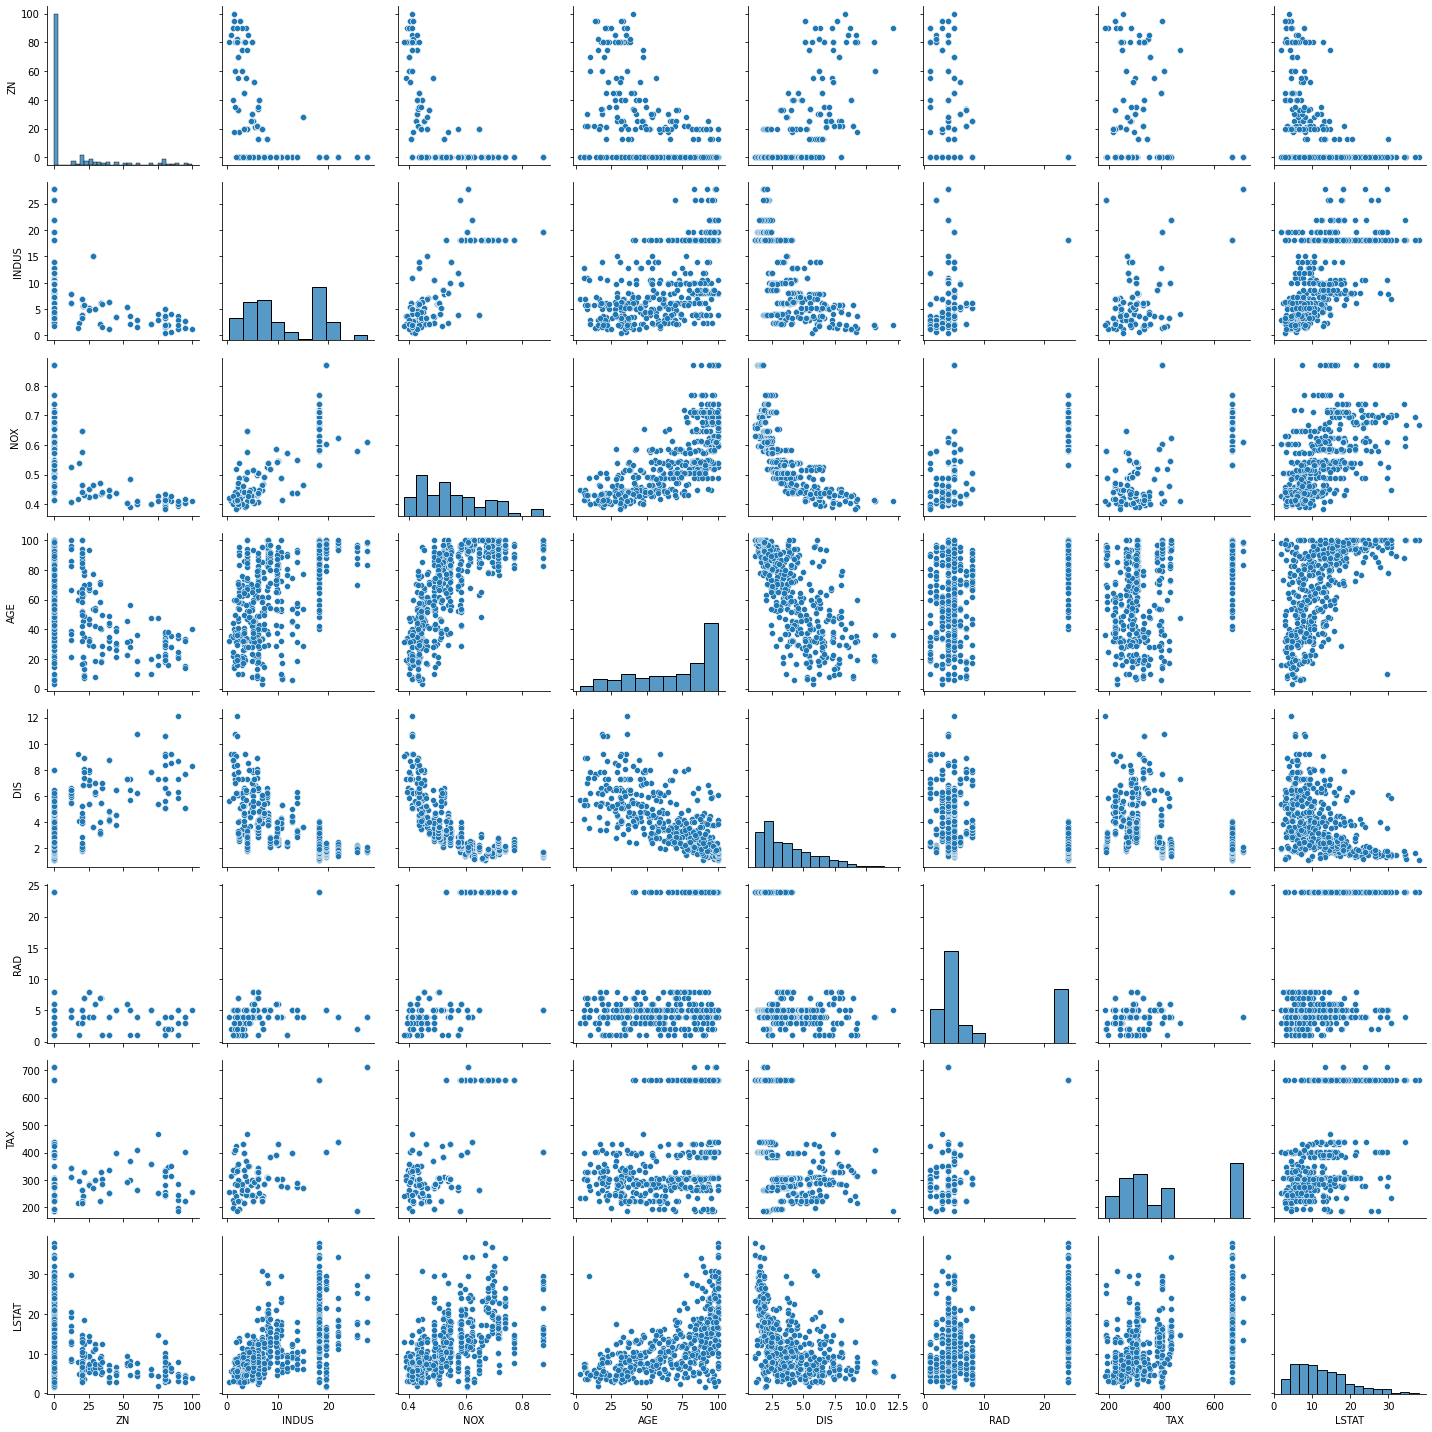

In [348]:
sns.pairplot(correlated_data)
plt.tight_layout()

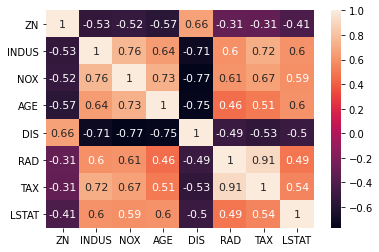

In [349]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 11})

In [350]:
X = correlated_data.drop(labels=['NOX'], axis = 1)
y = correlated_data['NOX']
X.head()

ZN  INDUS   AGE     DIS  RAD    TAX  LSTAT
0  18.0   2.31  65.2  4.0900  1.0  296.0   4.98
1   0.0   7.07  78.9  4.9671  2.0  242.0   9.14
2   0.0   7.07  61.1  4.9671  2.0  242.0   4.03
3   0.0   2.18  45.8  6.0622  3.0  222.0   2.94
4   0.0   2.18  54.2  6.0622  3.0  222.0   5.33

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [352]:
X_train.shape, X_test.shape

((404, 7), (102, 7))

In [353]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [354]:
y_predict = model.predict(X_test)

In [355]:
df = pd.DataFrame(data=[y_predict, y_test])
df.T

0      1
0    0.432169  0.460
1    0.699332  0.631
2    0.576416  0.550
3    0.693843  0.693
4    0.512100  0.437
..        ...    ...
97   0.377538  0.410
98   0.670239  0.713
99   0.464697  0.453
100  0.490696  0.489
101  0.584379  0.520

[102 rows x 2 columns]

In [356]:
correlated_data.columns

Index(['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'], dtype='object')

In [357]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.6506811715561248
mae:  0.04941934968102693
mse:  0.004896752593183274


In [358]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [359]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name  ...         MSE
0  ['ZN' 'INDUS' 'NOX' 'AGE' 'DIS' 'RAD' 'TAX' 'L...  ...  0.00489675

[1 rows x 6 columns]

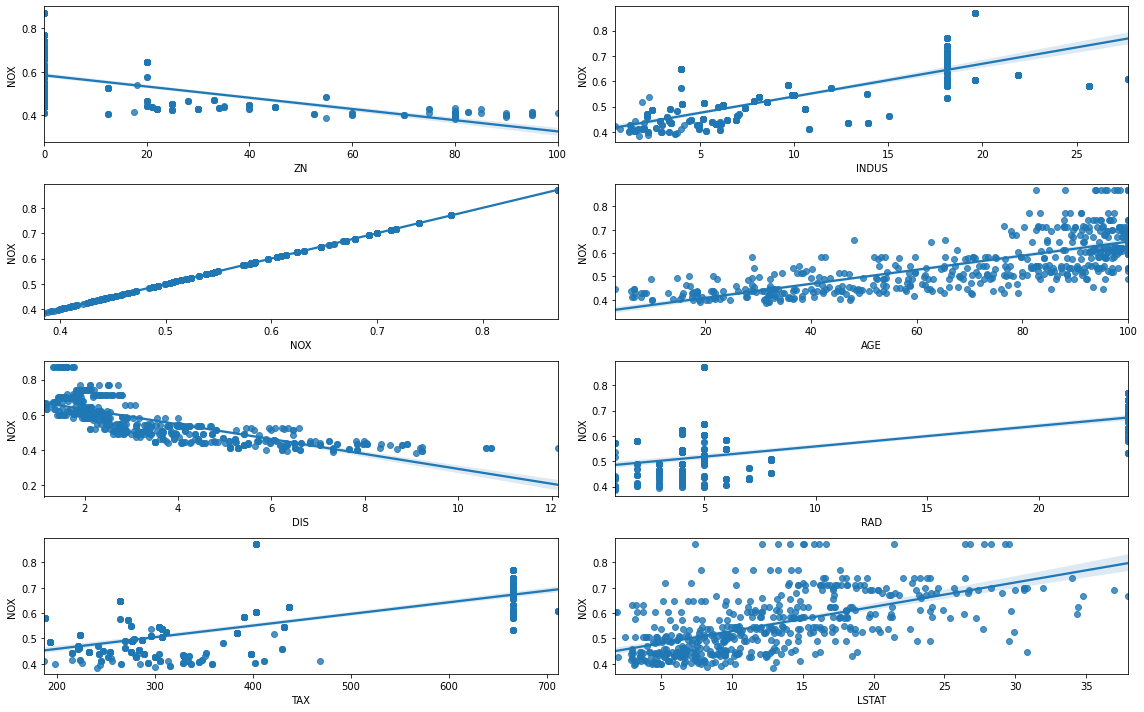

In [360]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,10))

col = correlated_data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.regplot(x=correlated_data[col[index]], y=correlated_data['NOX'], ax=ax[i][j])
    index += 1 
fig.tight_layout()

In [361]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['NOX'], threshold)
corr_value

Corr Value
INDUS    0.763651
NOX      1.000000
AGE      0.731470
DIS     -0.769230
RAD      0.611441
TAX      0.668023

In [362]:
correlated_data = data[corr_value.index]
correlated_data.head()

INDUS    NOX   AGE     DIS  RAD    TAX
0   2.31  0.538  65.2  4.0900  1.0  296.0
1   7.07  0.469  78.9  4.9671  2.0  242.0
2   7.07  0.469  61.1  4.9671  2.0  242.0
3   2.18  0.458  45.8  6.0622  3.0  222.0
4   2.18  0.458  54.2  6.0622  3.0  222.0

In [363]:
y_predict = get_y_predict(correlated_data, 'NOX')
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name  ...         MSE
0  ['ZN' 'INDUS' 'NOX' 'AGE' 'DIS' 'RAD' 'TAX' 'L...  ...  0.00489675
1            ['INDUS' 'NOX' 'AGE' 'DIS' 'RAD' 'TAX']  ...   0.0049973

[2 rows x 6 columns]

In [364]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [365]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.6506811715561247

## Precision of RM

In [366]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['RM'], threshold)
corr_value

Corr Value
RM       1.000000
LSTAT   -0.613808
Price    0.695360

In [367]:
corr_value.index.values

array(['RM', 'LSTAT', 'Price'], dtype=object)

In [368]:
correlated_data = data[corr_value.index]
correlated_data.head()

RM  LSTAT  Price
0  6.575   4.98   24.0
1  6.421   9.14   21.6
2  7.185   4.03   34.7
3  6.998   2.94   33.4
4  7.147   5.33   36.2

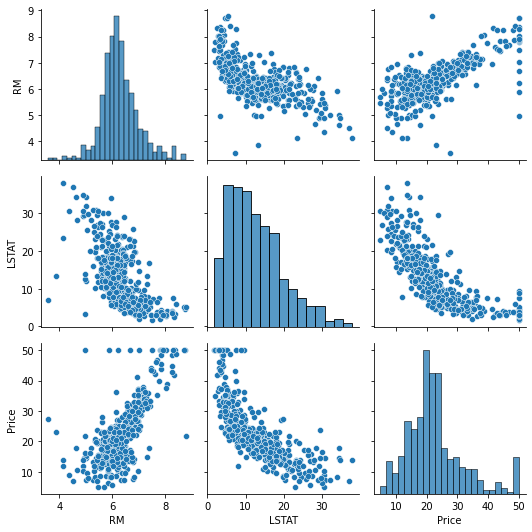

In [369]:
sns.pairplot(correlated_data)
plt.tight_layout()

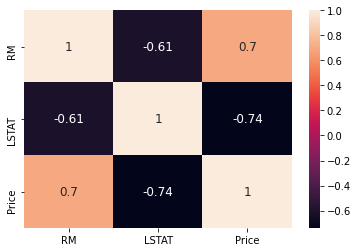

In [370]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

In [371]:
X = correlated_data.drop(labels=['RM'], axis = 1)
y = correlated_data['RM']
X.head()

LSTAT  Price
0   4.98   24.0
1   9.14   21.6
2   4.03   34.7
3   2.94   33.4
4   5.33   36.2

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [373]:
X_train.shape, X_test.shape

((404, 2), (102, 2))

In [374]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [375]:
y_predict = model.predict(X_test)

In [376]:
df = pd.DataFrame(data=[y_predict, y_test])
df.T

0      1
0    6.405297  6.333
1    7.498436  6.216
2    6.360636  6.373
3    5.571757  5.349
4    6.250379  6.232
..        ...    ...
97   6.522755  6.383
98   5.843917  6.525
99   6.131070  5.741
100  6.593708  6.375
101  6.193713  6.474

[102 rows x 2 columns]

In [377]:
correlated_data.columns

Index(['RM', 'LSTAT', 'Price'], dtype='object')

In [378]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.46453637779858736
mae:  0.38043208832125636
mse:  0.28467204793016115


In [379]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [380]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature corr_value  r2_score       MAE       MSE
0  ['RM' 'LSTAT' 'Price']        2        0.5  0.464536  0.380432  0.284672

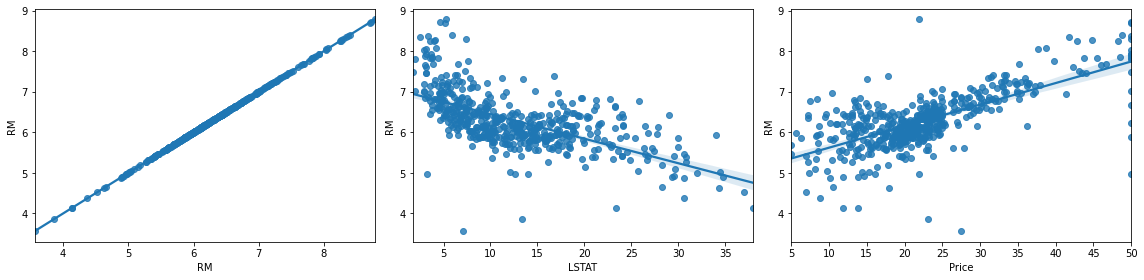

In [381]:
cols = 3
fig, ax = plt.subplots(ncols=cols, figsize=(16,4))

col = correlated_data.columns
index = 0

for i in range(cols):
  sns.regplot(x=correlated_data[col[index]], y=correlated_data['RM'], ax=ax[i])
  index += 1 
fig.tight_layout()

In [382]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['RM'], threshold)
corr_value

Corr Value
RM       1.000000
LSTAT   -0.613808
Price    0.695360

In [383]:
correlated_data = data[corr_value.index]
correlated_data.head()

RM  LSTAT  Price
0  6.575   4.98   24.0
1  6.421   9.14   21.6
2  7.185   4.03   34.7
3  6.998   2.94   33.4
4  7.147   5.33   36.2

In [384]:
y_predict = get_y_predict(correlated_data, 'RM')
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

features name #feature corr_value  r2_score       MAE       MSE
0  ['RM' 'LSTAT' 'Price']        2        0.5  0.464536  0.380432  0.284672
1  ['RM' 'LSTAT' 'Price']        2        0.6  0.464536  0.380432  0.284672

In [385]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [389]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.46453637779858725